# Author : Riya Shah
Task 2 : Prediction using Unsupervised Machine Learning
GRIP @ The Sparks Foundation.

In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.


# Technical Stack : Scikit Learn, Numpy, Pandas, Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm

# Step 1 - Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/"
path

'/content/drive/My Drive/'

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(path + "/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.drop("Id",axis = 1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
label_encoder = LabelEncoder()
data["Species"] = label_encoder.fit_transform(data.Species)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Step 2 - Data Preprocessing

In [ ]:
X = pd.DataFrame(data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
Y = pd.DataFrame(data, columns=['Species'])

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


#Step 3: Elbow method to find number of clusters

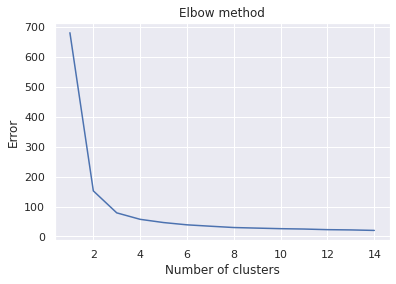

In [ ]:
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 15), Error)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

From this we choose the number of clusters as 3

# Step 4 - Model Training

In [ ]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


# Step 5 - Visualizing the Model Cluster

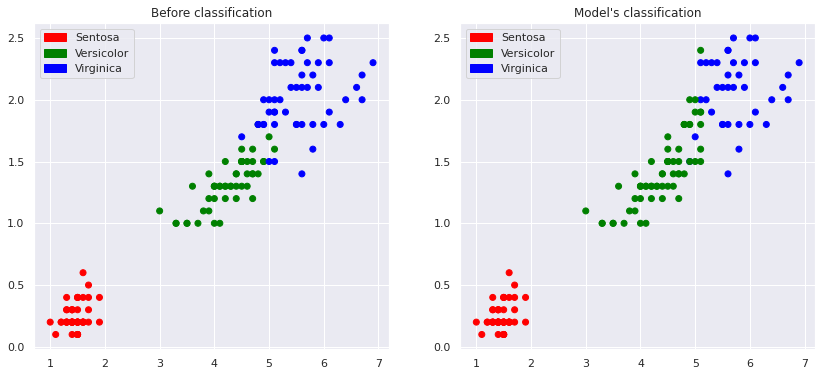

In [ ]:
plt.figure(figsize=(14,6))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=colors[Y['Species']])
plt.title('Before classification')

red_patch = mpatches.Patch(color='red', label='Sentosa')
plt.legend(handles=[red_patch])

green_patch = mpatches.Patch(color='green', label='Versicolor')
plt.legend(handles=[green_patch])

blue_patch = mpatches.Patch(color='blue', label='Virginica')
plt.legend(handles=[blue_patch])

plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Step 6 - Calculating the Accuracy and Confusion Matrix

In [ ]:
sm.accuracy_score(predictedY, Y['Species'])

0.8933333333333333

In [ ]:
cm=sm.confusion_matrix(predictedY, Y['Species'])

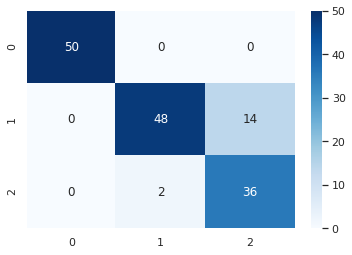

In [ ]:
import seaborn as sns; sns.set()
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#Conclusion

I was able to successfully carry-out prediction using Unsupervised Machine Learning task and was able to evaluate the model's clustering with 89% accuracy score.
Thank You